In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from pykalman import KalmanFilter
import math
import numpy as np

In [75]:
def read_data(file):
        data = pd.read_csv(file)
        data=data.dropna()
        data=data.rename(columns= {'ax': 'AccelerationX', 'ay': 'AccelerationY', 'az': 'AccelerationZ', 'atotal': 'NetAcceleration'})
        data = data[ (data['time'] >= 10) & (data['time'] <= 80) ]
        return data

In [76]:
#Data of First Male
data1 = read_data('Original_Data/Male-1-right-hand.csv')
data2 = read_data('Original_Data/Male-1-left-hand.csv')
data3 = read_data('Original_Data/Male-1-left-pocket.csv')
data4 = read_data('Original_Data/Male-1-right-pocket.csv')
data5 = read_data('Original_Data/Male-1-left-ankle.csv')
data6 = read_data('Original_Data/Male-1-right-ankle.csv')

In [77]:
print("Male-1 Right Hand Data")
print(data1)

Male-1 Right Hand Data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
992   10.013857          -0.31          -0.90          -1.13             1.47
993   10.016249          -0.33          -0.84          -1.17             1.47
994   10.026328          -0.35          -0.80          -1.17             1.45
995   10.038723          -0.42          -0.79          -1.21             1.50
996   10.046585          -0.60          -0.87          -1.29             1.66
...         ...            ...            ...            ...              ...
7930  79.952736           0.56          -1.41          -1.18             1.92
7931  79.960708          -0.08          -1.15          -2.87             3.09
7932  79.970775          -0.37          -0.86          -3.87             3.98
7933  79.989731          -0.38          -0.72          -4.21             4.28
7934  79.992205          -0.15          -0.66          -3.66             3.72

[6943 rows x 5 columns]


In [78]:
print("Male-1 Left Hand Data")
print(data2)

Male-1 Left Hand Data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
992   10.003871           1.18          -2.17          -0.99             2.66
993   10.015779           0.99          -2.06          -1.29             2.62
994   10.023850           0.75          -1.87          -1.52             2.52
995   10.033803           0.66          -1.62          -1.74             2.46
996   10.047762           0.69          -1.43          -1.95             2.51
...         ...            ...            ...            ...              ...
7903  79.961626          -1.61           0.47          -1.07             1.98
7904  79.965035          -1.17           0.77          -0.92             1.67
7905  79.972448          -0.79           1.10          -0.63             1.49
7906  79.993598          -0.62           1.30          -0.16             1.44
7907  79.996151          -0.61           1.38           0.22             1.52

[6916 rows x 5 columns]


In [79]:
print("Male-1 Left Pocket Data")
print(data3)

Male-1 Left Pocket Data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
992   10.008054           0.05          -2.03          -3.12             3.72
993   10.017165           1.09          -2.45          -4.05             4.85
994   10.027307           1.01          -2.58          -3.91             4.79
995   10.037392           0.59          -2.27          -2.36             3.32
996   10.048822           0.54          -1.81          -0.85             2.07
...         ...            ...            ...            ...              ...
7930  79.958634           0.85           0.84          -0.63             1.35
7931  79.969417           0.95           0.56          -0.61             1.26
7932  79.979650           1.08           0.23          -0.59             1.25
7933  79.988695           1.28          -0.19          -0.56             1.41
7934  79.998686           1.50          -0.62          -0.57             1.72

[6943 rows x 5 columns]


In [80]:
print("Male-1 Right Pocket Data")
print(data4)

Male-1 Right Pocket Data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
992   10.010723          -1.09           1.70           1.32             2.41
993   10.021275          -1.32           1.09           1.53             2.29
994   10.029753          -1.46           0.62           1.39             2.10
995   10.040242          -1.46           0.42           1.15             1.90
996   10.050006          -1.38           0.35           1.03             1.75
...         ...            ...            ...            ...              ...
7930  79.954743          -3.50          -0.23           2.38             4.23
7931  79.964845          -4.18          -0.44          -1.00             4.32
7932  79.976137          -5.26          -1.57          -1.73             5.75
7933  79.985834          -5.36          -2.46          -0.29             5.90
7934  79.998560          -4.81          -2.73           1.50             5.73

[6943 rows x 5 columns]


In [81]:
print("Male-1 Left Ankle Data")
print(data5)

Male-1 Left Ankle Data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
992   10.000625           5.46           9.16           0.61            10.68
993   10.011020           5.45          12.10          -2.78            13.55
994   10.022506           6.63           7.25          -7.54            12.38
995   10.031097           7.15          -1.00          -7.80            10.62
996   10.045549           5.64           1.61           8.58            10.39
...         ...            ...            ...            ...              ...
7931  79.954797          -0.62           3.29           0.71             3.42
7932  79.964798           0.43           4.37          -0.76             4.45
7933  79.974868           1.08           5.47          -1.85             5.87
7934  79.986002          -0.24           3.86          -1.06             4.01
7935  79.995133          -3.37           1.84          -1.57             4.14

[6944 rows x 5 columns]


In [82]:
print("Male-1 Right Ankle Data")
print(data6)

Male-1 Right Ankle Data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
992   10.003154           0.44           0.24          -0.06             0.50
993   10.013353           0.46           0.30          -0.03             0.55
994   10.023278           0.36           0.22          -0.19             0.46
995   10.033392           0.29           0.22          -0.15             0.39
996   10.044727           0.28           0.34           0.31             0.53
...         ...            ...            ...            ...              ...
7931  79.960442           0.38           0.78          -0.47             0.98
7932  79.968385           0.46           0.99          -0.22             1.11
7933  79.978504           0.58           1.02          -0.41             1.24
7934  79.988569           0.87           1.27          -0.20             1.55
7935  79.998549           1.09           1.97           0.96             2.44

[6944 rows x 5 columns]


In [83]:
#Data of First Female
data7 = read_data('Original_Data/Female-1-left-hand.csv')
data8 = read_data('Original_Data/Female-1-right-hand.csv')
data9 = read_data("Original_Data/Female-1-left-pocket.csv")
data10 = read_data("Original_Data/Female-1-right-pocket.csv")
data11 = read_data("Original_Data/Female-1-left-ankle.csv")
data12 = read_data("Original_Data/Female-1-right-ankle.csv")

In [84]:
print("Female-1 Right Hand Data")
print(data8)

Female-1 Right Hand Data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
992   10.007876          -0.32          -0.18          -0.18             0.40
993   10.016900          -0.36          -0.15          -0.33             0.51
994   10.040222          -0.37          -0.09          -0.31             0.49
995   10.043472          -0.25          -0.01          -0.12             0.27
996   10.046682          -0.11           0.06           0.13             0.18
...         ...            ...            ...            ...              ...
7929  79.961956           0.02          -0.61           0.36             0.70
7930  79.965205           0.18          -0.66           0.44             0.81
7931  79.968412           0.22          -0.67           0.24             0.74
7932  79.977717           0.20          -0.65          -0.02             0.68
7933  79.988311           0.25          -0.66          -0.22             0.73

[6942 rows x 5 columns]


In [85]:
print("Female-1 Left Hand Data")
print(data7)

Female-1 Left Hand Data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
992   10.001339          -1.05           0.94           1.41             1.99
993   10.011274          -0.99           1.03           0.86             1.66
994   10.022565          -0.83           1.02           0.61             1.44
995   10.032322          -0.76           0.90           0.43             1.25
996   10.042451          -0.86           0.77           0.35             1.20
...         ...            ...            ...            ...              ...
7930  79.954483           0.55          -0.76           0.55             1.08
7931  79.966140           0.76          -0.73           0.22             1.07
7932  79.973568           1.01          -0.64           0.02             1.19
7933  79.983919           1.10          -0.58          -0.10             1.24
7934  79.995081           0.94          -0.56          -0.23             1.11

[6943 rows x 5 columns]


In [86]:

print("Female-1 Left Pocket Data")
print(data9)

Female-1 Left Pocket Data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
992   10.008692           1.21           0.70          -0.54             1.49
993   10.024655           1.22           0.61          -0.45             1.43
994   10.028811           1.27           0.64          -0.36             1.46
995   10.040193           1.23           0.62          -0.32             1.41
996   10.048993           1.22           0.54          -0.28             1.36
...         ...            ...            ...            ...              ...
7930  79.958273          -6.45           2.60          -2.24             7.30
7931  79.967420          -5.74           2.74          -2.07             6.68
7932  79.977525          -4.80           2.81          -1.43             5.74
7933  79.987603          -3.66           2.68          -0.27             4.54
7934  79.997633          -2.01           2.41           1.39             3.43

[6943 rows x 5 columns]


In [87]:
print("Female-1 Right Pocket Data")
print(data10)

Female-1 Right Pocket Data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
1210  10.007836           5.23           1.47          -3.11             6.25
1211  10.016806           5.46           1.62          -2.36             6.16
1212  10.026749           5.55           1.74          -2.00             6.15
1213  10.036783           5.56           1.88          -1.97             6.19
1214  10.046963           5.58           2.04          -1.83             6.21
...         ...            ...            ...            ...              ...
8149  79.962924          -1.53           0.96           1.67             2.45
8150  79.970765          -1.64           0.86           1.46             2.35
8151  79.979600          -1.69           0.73           1.34             2.27
8152  79.989595          -1.65           0.65           1.37             2.24
8153  79.999894          -1.59           0.62           1.42             2.22

[6944 rows x 5 columns]


In [88]:
print("Female-1 Left Ankle Data")
print(data11)

Female-1 Left Ankle Data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
991   10.000528          -0.14           0.05          -0.39             0.41
992   10.010473          -0.14           0.13          -0.63             0.65
993   10.027937          -0.34           0.14          -0.82             0.89
994   10.030507          -0.76           0.23          -0.79             1.12
995   10.042176          -1.04           0.46          -0.07             1.13
...         ...            ...            ...            ...              ...
7930  79.958723          -7.58          -4.05          10.36            13.46
7931  79.967795          -2.75         -17.31           0.62            17.53
7932  79.977710          -6.76          -3.22          -1.14             7.57
7933  79.987983          -4.39           4.65           6.48             9.10
7934  79.997971           2.88          -3.49           3.68             5.83

[6944 rows x 5 columns]


In [89]:
print("Female-1 Right Ankle Data")
print(data12)

Female-1 Right Ankle Data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
992   10.011133           0.42           0.45          -0.27             0.67
993   10.020012           0.60           0.53          -0.10             0.80
994   10.030011           0.63           0.49          -0.06             0.80
995   10.040138           0.49           0.60           0.07             0.77
996   10.050263           0.31           0.60          -0.12             0.68
...         ...            ...            ...            ...              ...
7930  79.954490           1.00           0.98           0.77             1.59
7931  79.964559           1.00           1.15           0.74             1.69
7932  79.982397           0.61           1.13           0.31             1.32
7933  79.984753           0.44           1.19          -0.23             1.28
7934  79.994775           0.55           1.58          -0.38             1.71

[6943 rows x 5 columns]


In [90]:
data13 = read_data("Original_Data/Male-2-left-hand.csv")
data14 = read_data("Original_Data/Male-2-right-hand.csv")
data15 = read_data("Original_Data/Male-2-left-pocket.csv")
data16 = read_data("Original_Data/Male-2-right-pocket.csv")
data17 = read_data("Original_Data/Male-2-left-ankle.csv")
data18 = read_data("Original_Data/Male-2-right-ankle.csv")

In [91]:
print("Male-2 left hand data")
print(data13)


Male-2 left hand data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
997   10.007122          -1.42          -3.05          -0.69             3.43
998   10.009792          -1.75          -3.43          -0.27             3.86
999   10.016455          -1.81          -3.24           0.27             3.72
1000  10.022169          -1.67          -2.67           1.00             3.30
1001  10.033043          -1.52          -2.19           1.72             3.17
...         ...            ...            ...            ...              ...
7589  76.039365           0.13          -1.07           4.43             4.55
7590  76.046077           0.14          -1.27           5.03             5.18
7591  76.056445           0.30          -1.44           5.44             5.63
7592  76.066253           0.59          -1.59           5.84             6.08
7593  76.076031           1.09          -1.88           5.78             6.17

[6597 rows x 5 columns]


In [92]:
print("Male-2 right hand data")
print(data14)

Male-2 right hand data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
998   10.001725           2.57           0.94          -4.83             5.55
999   10.012681           2.44           1.45          -3.49             4.49
1000  10.021883           2.19           1.82          -2.08             3.52
1001  10.031815           2.08           1.96          -0.79             2.96
1002  10.043047           2.34           1.89           0.18             3.01
...         ...            ...            ...            ...              ...
7627  76.414417          -0.16          -0.08          -1.34             1.35
7628  76.430524          -0.10           0.18          -1.65             1.66
7629  76.435275          -0.18           0.47          -1.62             1.69
7630  76.444776          -0.30           0.55          -1.93             2.02
7631  76.454807          -0.08           0.45          -2.61             2.64

[6634 rows x 5 columns]


In [93]:
print("Male-2 left pocket data")
print(data15)

Male-2 left pocket data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
996   10.009406           7.55          -1.06          -3.04             8.20
997   10.012867           7.09          -1.65          -3.01             7.87
998   10.021142           6.56          -2.45          -3.10             7.65
999   10.031286           5.65          -3.41          -3.17             7.32
1000  10.041070           4.85          -4.03          -3.07             7.01
...         ...            ...            ...            ...              ...
7962  79.956812           0.26           5.11           3.52             6.21
7963  79.959889           6.33           4.60           8.25            11.37
7964  79.966862          14.80           1.39           8.69            17.21
7965  79.976940          17.09          -0.43           2.86            17.33
7966  79.986612          16.73          -1.24          -2.90            17.02

[6971 rows x 5 columns]


In [94]:
print("Male-2 right pocket data")
print(data16)

Male-2 right pocket data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
998   10.005031           2.13          -0.89          -4.01             4.62
999   10.014608           2.91          -0.97          -5.30             6.12
1000  10.024984           3.29           0.23          -6.18             7.00
1001  10.035588           3.48           1.28          -6.09             7.13
1002  10.044346           2.85           1.11          -5.38             6.18
...         ...            ...            ...            ...              ...
7976  79.954151          -2.03           2.27           3.05             4.31
7977  79.960578          -1.92           2.88           3.06             4.62
7978  79.971639          -1.81           3.16           3.01             4.72
7979  79.981142          -1.81           3.15           2.70             4.52
7980  79.991363          -1.84           2.96           2.12             4.07

[6983 rows x 5 columns]


In [95]:
print("Male-2 left ankle data")
print(data17)

Male-2 left ankle data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
998   10.006189           3.67           5.78           0.27             6.85
999   10.017634           4.83           6.71           0.67             8.29
1000  10.026790           6.23           7.32           0.70             9.63
1001  10.036147           7.60           8.04           0.38            11.07
1002  10.047298           8.36           9.79          -1.08            12.91
...         ...            ...            ...            ...              ...
7977  79.957886           6.60           8.87          -1.18            11.11
7978  79.967803           6.16           1.08           2.27             6.65
7979  79.978969           3.97          -8.01           1.09             9.00
7980  79.988409           0.36          -9.13           1.51             9.26
7981  79.998552          -2.85          -2.81           5.51             6.81

[6984 rows x 5 columns]


In [96]:
print("Male-2 right ankle data")
print(data18)    

Male-2 right ankle data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
998   10.005032         -34.34          -3.24         -25.40            42.83
999   10.015241         -30.53          12.60         -17.22            37.24
1000  10.025192         -10.48          12.22           2.03            16.22
1001  10.036328           0.72          -1.21           5.06             5.25
1002  10.046895           8.42          -3.96           7.00            11.64
...         ...            ...            ...            ...              ...
7977  79.947169           3.40          -0.30           8.56             9.21
7978  79.957244          16.71          -7.10          10.29            20.86
7979  79.967374          20.77          -5.29           6.56            22.41
7980  79.977802          12.59          -1.64          -0.53            12.70
7981  79.989408           1.40           3.92          -6.96             8.10

[6984 rows x 5 columns]


In [97]:
data19 = read_data("Original_Data/Female-2-left-hand.csv")
data20 = read_data("Original_Data/Female-2-right-hand.csv")
data21 = read_data("Original_Data/Female-2-left-pocket.csv")
data22 = read_data("Original_Data/Female-2-right-pocket.csv")
data23 = read_data("Original_Data/Female-2-left-ankle.csv")
data24 = read_data("Original_Data/Female-2-right-ankle.csv")

In [98]:
print("Female-2 Left Hand Data")
print(data19)

Female-2 Left Hand Data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
996   10.007566          -0.59           0.58          -1.61             1.81
997   10.019358          -0.34           1.59          -1.56             2.25
998   10.027686           0.02           2.36          -1.64             2.87
999   10.039118           0.40           3.06          -1.92             3.63
1000  10.048791           0.60           3.66          -2.23             4.32
...         ...            ...            ...            ...              ...
7961  79.952759           0.32          -0.52           2.57             2.64
7962  79.963983          -0.16          -0.74           2.70             2.80
7963  79.972667          -0.62          -1.21           2.85             3.15
7964  79.982960          -0.97          -1.83           2.88             3.54
7965  79.996710          -1.16          -2.33           2.73             3.77

[6970 rows x 5 columns]


In [99]:
print("Female-2 Right Hand Data")
print(data20)

Female-2 Right Hand Data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
1004  10.013381           5.28          -0.49           4.78             7.13
1005  10.018725           4.96          -0.33           4.56             6.74
1006  10.028713           4.56          -0.11           4.16             6.17
1007  10.038600           4.42          -0.20           3.55             5.67
1008  10.048429           4.66          -0.82           2.83             5.51
...         ...            ...            ...            ...              ...
6352  63.286700          -2.21           0.73           2.92             3.73
6353  63.296621          -2.55           0.53           2.72             3.76
6354  63.306716          -2.92           0.26           2.54             3.87
6355  63.316658          -3.30          -0.03           2.35             4.05
6356  63.326636          -3.77          -0.29           2.13             4.33

[5353 rows x 5 columns]


In [100]:
print("Female-2 Left Pocket Data")
print(data21)

Female-2 Left Pocket Data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
998   10.009337          -3.91           0.29          -6.29             7.41
999   10.018688          -3.19          -0.41          -4.74             5.72
1000  10.029000          -2.40          -0.90          -2.94             3.90
1001  10.038732          -1.85          -1.11          -1.62             2.69
1002  10.057400          -1.33          -1.08          -0.74             1.86
...         ...            ...            ...            ...              ...
7117  71.344039          -1.58          -0.72          -1.02             2.01
7118  71.354079          -1.32          -1.23          -0.60             1.90
7119  71.364403          -1.39          -1.24          -0.81             2.03
7120  71.374125          -1.15          -0.96          -1.37             2.03
7121  71.384752          -1.09          -0.78          -1.57             2.06

[6124 rows x 5 columns]


In [101]:
print("Female-2 Right Pocket Data")
print(data22)

Female-2 Right Pocket Data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
998   10.011353           2.00          -0.17          -2.19             2.97
999   10.019974           2.96          -0.12          -3.13             4.30
1000  10.029921           3.06           0.14          -3.62             4.74
1001  10.057359           2.87           0.32          -3.73             4.71
1002  10.063159           2.94           0.39          -3.68             4.72
...         ...            ...            ...            ...              ...
7976  79.953681           0.10           2.01           5.90             6.23
7977  79.963820          -0.41           2.90           5.71             6.41
7978  79.974646          -0.85           3.71           5.61             6.77
7979  79.983749          -1.11           4.40           5.62             7.22
7980  79.993960          -1.52           4.83           5.64             7.57

[6983 rows x 5 columns]


In [102]:
print("Female-2 Left Ankle Data")
print(data23)

Female-2 Left Ankle Data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
997   10.000420           2.44          -1.22           4.36             5.14
998   10.011860           1.99          -0.86           3.03             3.72
999   10.020694           1.17          -0.35           0.44             1.29
1000  10.030808           0.14           0.49          -0.99             1.11
1001  10.041382          -0.83           0.27          -0.72             1.13
...         ...            ...            ...            ...              ...
7977  79.952576           9.40           9.55           2.86            13.70
7978  79.962760          10.62          10.28           2.48            14.98
7979  79.972698          12.19           9.91           1.48            15.77
7980  79.982804          13.11           7.83           0.68            15.28
7981  79.993471          12.35           3.78           1.26            12.97

[6985 rows x 5 columns]


In [103]:
print("Female-2 Right Ankle Data")
print(data24)

Female-2 Right Ankle Data
           time  AccelerationX  AccelerationY  AccelerationZ  NetAcceleration
998   10.008899          -2.44           2.55           1.55             3.85
999   10.019617          -1.15           3.69           0.78             3.94
1000  10.029520          -0.27           5.39           0.21             5.40
1001  10.039601          -0.01           7.47          -0.27             7.47
1002  10.051449          -0.11           9.67          -0.60             9.68
...         ...            ...            ...            ...              ...
7977  79.951215          -4.69           5.93          -6.49             9.96
7978  79.961280           0.20           2.13          -1.88             2.84
7979  79.972026           3.48          -2.37           0.32             4.22
7980  79.984120           4.37          -5.82           2.97             7.86
7981  79.991608           3.69          -5.97           7.79            10.48

[6984 rows x 5 columns]


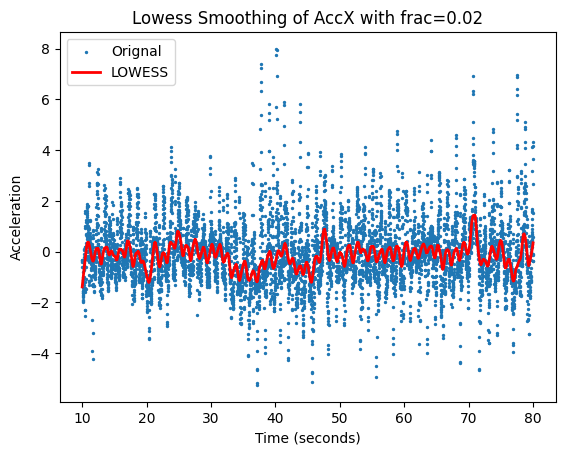

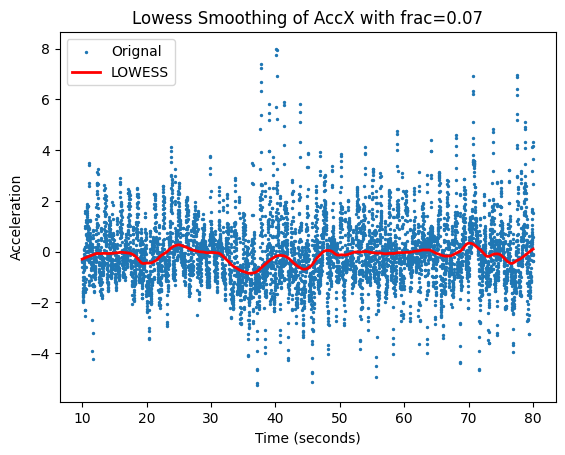

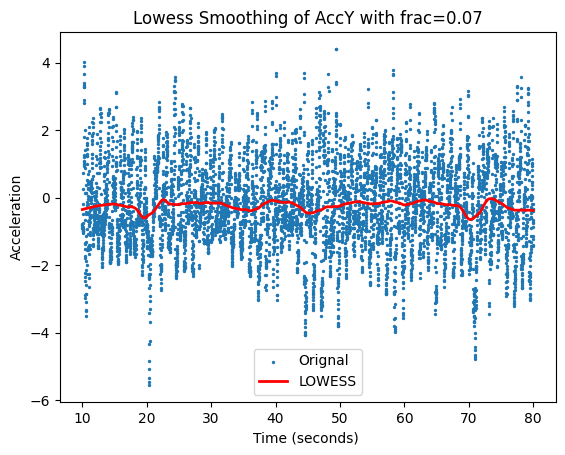

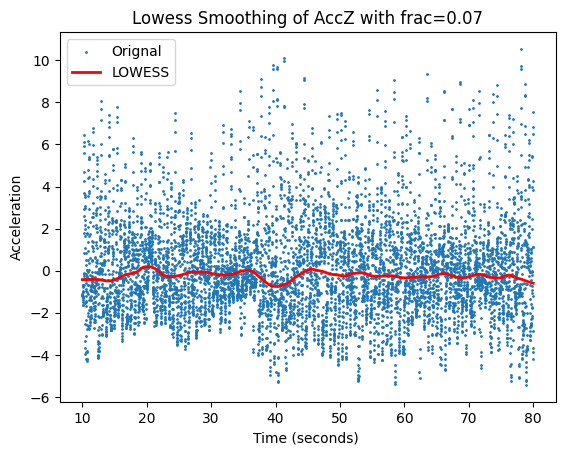

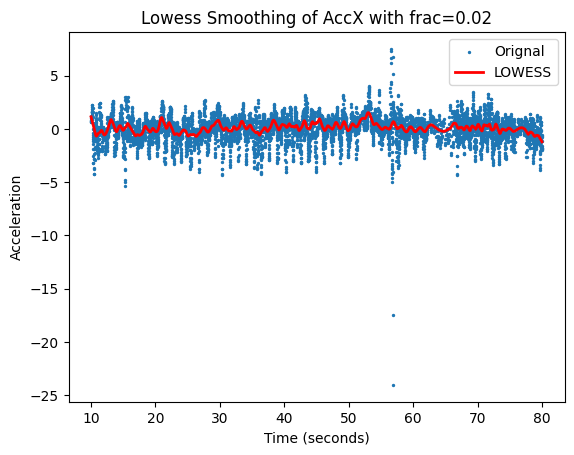

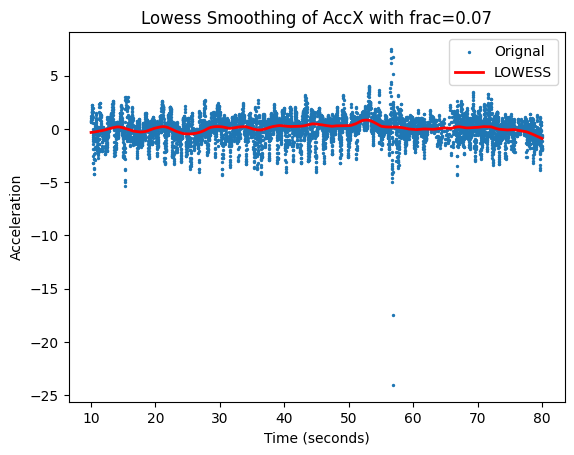

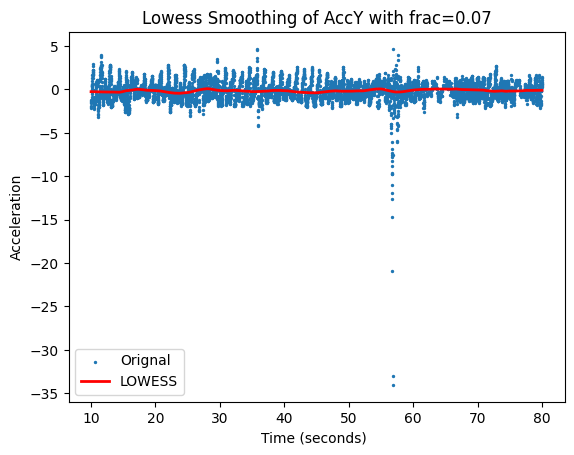

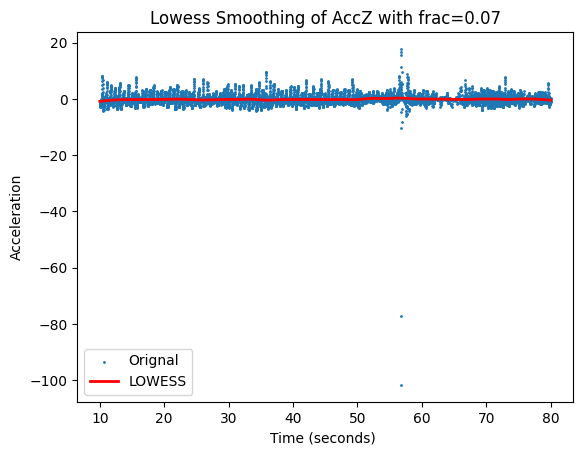

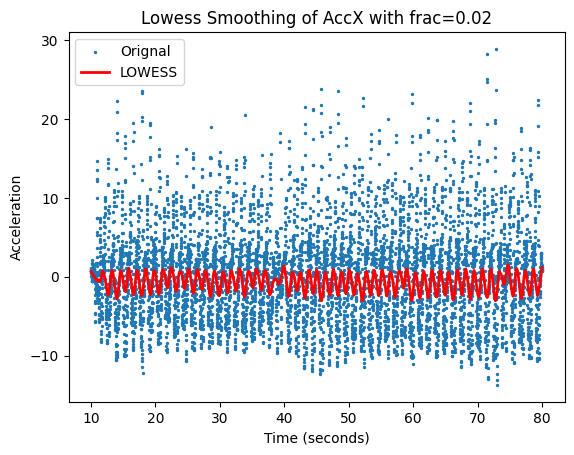

KeyboardInterrupt: 

In [105]:
i = 1
data_list = [data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12,data13,data14,data15
            ,data16,data17,data18,data19,data20,data21,data22,data23,data24]
for data in data_list :
    #With Fraction = 0.02
    x_loess1= lowess(data['AccelerationX'], data['time'], frac=0.02)
    # With Fraction = 0.07
    x_loess= lowess(data['AccelerationX'], data['time'], frac=0.07 )
    y_loess= lowess(data['AccelerationY'], data['time'], frac=0.07 )
    z_loess= lowess(data['AccelerationZ'], data['time'], frac=0.07 )
    # Scatter Plot with frac = 0.02
    plt.scatter(data['time'],data['AccelerationX'], s=2,label='Orignal')
    plt.plot(x_loess[:,0], x_loess1[:, 1], 'r-', linewidth=2, label='LOWESS')
    plt.legend()
    plt.xlabel('Time (seconds)')
    plt.ylabel('Acceleration')
    plt.title('Lowess Smoothing of AccX with frac=0.02')
    #plt.savefig(f"Lowess{i}_0.02.jpg")
    plt.show();
    plt.scatter(data['time'],data['AccelerationX'], s=2,label='Orignal')

    plt.plot(x_loess[:,0], x_loess[:, 1], 'r-', linewidth=2, label='LOWESS')
    plt.legend()
    plt.xlabel('Time (seconds)')
    plt.ylabel('Acceleration')
    plt.title('Lowess Smoothing of AccX with frac=0.07')
    plt.savefig(f"Lowess{i}X_0.07.jpg")
    plt.show()
    plt.scatter(data['time'],data['AccelerationY'], s=2,label='Orignal')
    plt.plot(y_loess[:,0], y_loess[:, 1], 'r-', linewidth=2, label='LOWESS')
    plt.legend()
    plt.xlabel('Time (seconds) ')
    plt.ylabel('Acceleration')
    plt.title('Lowess Smoothing of AccY with frac=0.07')
    plt.savefig(f"Lowess{i}Y_0.07.jpg")
    plt.show()

    plt.scatter(data['time'],data['AccelerationZ'], s=1,label='Orignal')
    plt.plot(z_loess[:,0], z_loess[:, 1], 'r-', linewidth=2, label='LOWESS')
    plt.legend()
    plt.xlabel('Time (seconds) ')
    plt.ylabel('Acceleration')
    plt.title('Lowess Smoothing of AccZ with frac=0.07')
    plt.savefig(f"Lowess{i}Z_0.07.jpg")
    plt.show()
    i = i + 1